# Firing table

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

This example involves the kinematics of a projectile, whose dynamical relations can be described by the following differential equations

<br>

\begin{align*}
  m\dot{V} &=  -0.5\rho V^2 S C_d - mg\sin\gamma \\
  V\dot{\gamma} &= -g\cos\gamma \\
  \dot{R} &= V\cos\gamma \\
  \dot{h} &= V\sin\gamma
\end{align*}

<br>

where $V$, and $\gamma$ represents the speed and the flight path angle of the projectile, where a positive $\gamma$ implies the projectile is going up, and $\gamma=+\pi/2$ implies vertical ascend.

<center>
<img src="https://jonghank.github.io/ee370/files/projectile.png" width="600">
</center>
Throughout this problem, you can assume that the gravitational acceleration is constant, $g=9.8m/s^2$, and the air density is well approximated by the following formula.

<br>

$$
  \rho(h) = 1.225 \left(1-2.256\times 10^{-5}h \right)^{5.256}
$$

<br>

Suppose a projectile with the following specifications is launched.

- $m$: mass (=$40kg$)
- $d$: diameter (=$16cm$)
- $S$: cross-section area (=$\pi d^2/4$)
- $C_d$: drag coefficient (=$0.2$)
- $V(0)$: initial velocity (=$1000m/s$)





<br>

**(Problem 1)** For various initial launch angles, $\gamma(0) = 20,25,\dots, 65, 70$ degrees, plot the vertical trajectory (on $R-h$ plane) and the time history of the projectile's speed.

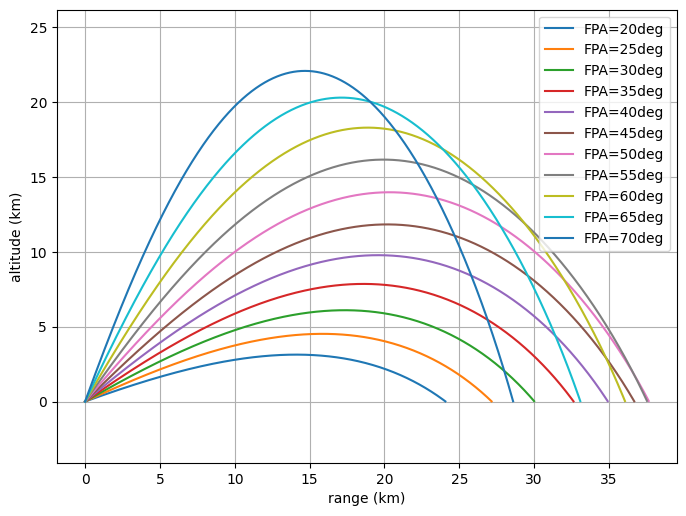

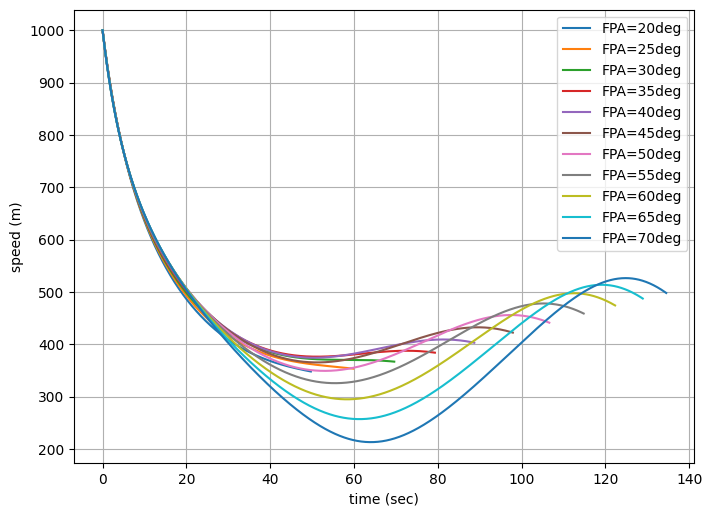

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.integrate as spi

m = 40
d = 0.16
S = np.pi*(d**2)/4
g = 9.8
Cd = 0.2  # drag coefficient . 직경 등 다른 요소들도 방정식에 대입해야 정확한 식을 구할 수 있다. 

# function that returns dy/dt=[hdot, vdot]
def model(z,t):                     #인수는 변하는 값만
  v, gamma, r, h = z                  
  rho = 1.225*(1-2.256e-5*h)**5.256 # air density
  vdot = -0.5*rho*(v**2)*S*Cd/m - g*np.sin(gamma) #주어진 식 활용
  gammadot = -g*np.cos(gamma)/v
  rdot = v*np.cos(gamma)
  hdot = v*np.sin(gamma)
  
  return np.array([vdot, gammadot,rdot,hdot])
  
# time points
t = np.arange(0,1000,0.1) #t 영역
states_list = np.zeros((len(t),4)) #np.zeros : (())괄호 2개
fpa_list = np.arange(20,71,5)

for i in fpa_list : 
  ic=[1000,i*np.pi/180,0,0]
  states_list[0] = ic

  for j in range(len(t)-1):
    state = spi.odeint(model,states_list[j],[t[j],t[j+1]]) #다른 방법??
    states_list[j+1]=state[-1] #대입했으니 j+1까지 표시해야됨.
    if states_list[j+1,3]<0:
      break
  
  plt.figure(num=1, figsize=(8,6), dpi=100) #한 그래프에 표현되도록.
  plt.plot(states_list[:j+1,2]/1000 , states_list[:j+1,3]/1000, label=f'FPA={i}deg')
  
  plt.figure(num=2, figsize=(8,6), dpi=100)
  plt.plot(t[:j], states_list[:j,0], label=f'FPA={i}deg')

plt.figure(num=1, figsize=(8,6), dpi=100) #한번에 적용하기.
plt.xlabel(r'range (km)')
plt.ylabel(r'altitude (km)')
plt.axis('equal')
plt.legend()
plt.grid()

plt.figure(num=2, figsize=(8,6), dpi=100)
plt.xlabel(r'time (sec)')
plt.ylabel(r'speed (m)')
plt.legend()
plt.grid()
plt.show()



<br>

**(Problem 2)** With which initial launch angle, $\gamma(0)$, should the projectile be launched, so that it reaches its maximum range? Answers upto the two most significant digits would suffice. 

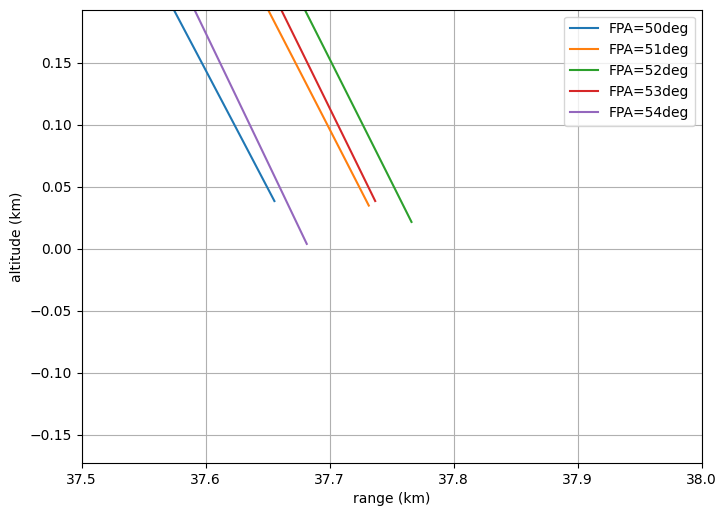

In [ ]:
#위에 R-H그래프를 보면 최대 사거리를 가지는 발사각은 50~55도 사이일 때 임을 알 수 있다.
fpa_list = np.arange(50,55,1)

for i in fpa_list:
  ic = [1000,i*np.pi/180,0,0]
  states_list[0] = ic
  
  for j in range(len(t)-1):
    state = spi.odeint(model,states_list[j],[t[j],t[j+1]])
    states_list[j+1] = state[-1]
    if states_list[j+1,3]<0:
      break

  plt.figure(num=1,figsize=(8,6), dpi=100)
  plt.plot(states_list[:j+1,2]/1000 , states_list[:j+1,3]/1000, label=f'FPA={i}deg') #i도일 때 최대 사거리.

plt.figure(num=1, figsize=(8,6), dpi=100) #한꺼번에 묶기
plt.xlabel(r'range (km)')
plt.ylabel(r'altitude (km)')
plt.axis('equal')
plt.xlim(37.5,38)
plt.ylim(0,0.02)
plt.legend()
plt.grid()


그래프를 통해서 deg = 52일 때 range가 최대값을 가지는 것을 볼 수 있다.

<br>

**(Problem 3)** Suppose you use the projectile for a parcel delivery service for your customers. Then you will probably need to make at least two modifications to your system, since the initial and the final speed of the projectile are too much high. So you decided to use a small engine, that will slowly accelerate the projectile in the beginning, and a small parachute that decelerates the projectile when it reaches the target. Your parachute deploys when $h\le 1000m$ and $\gamma\le 0$

So your model now looks like,

\begin{align*}
  m\dot{V} &= -0.5\rho V^2 S C_d - mg\sin\gamma + T \\
  V\dot{\gamma} &= -g\cos\gamma \\
  \dot{R} &= V\cos\gamma \\
  \dot{h} &= V\sin\gamma
\end{align*}

with 

$$
T =
\begin{cases}
4000N & \text{if } t \le 5  s\\
0   & \text{otherwise}
\end{cases}
$$
and
$$
C_{d}=
\begin{cases}
10    & \text{if }  \gamma\le 0 \text{ and } h\le 1000m \\
0.2   & \text{otherwise}
\end{cases}
$$

Find a sample trajectory when 

- $m$: mass (=$40kg$)
- $d$: diameter (=$16cm$)
- $S$: cross-section area (=$\pi d^2/4$)
- $V(0)$: initial velocity (=$10$)
- $\gamma(0)$: launch angle (=$50\text{deg}$)



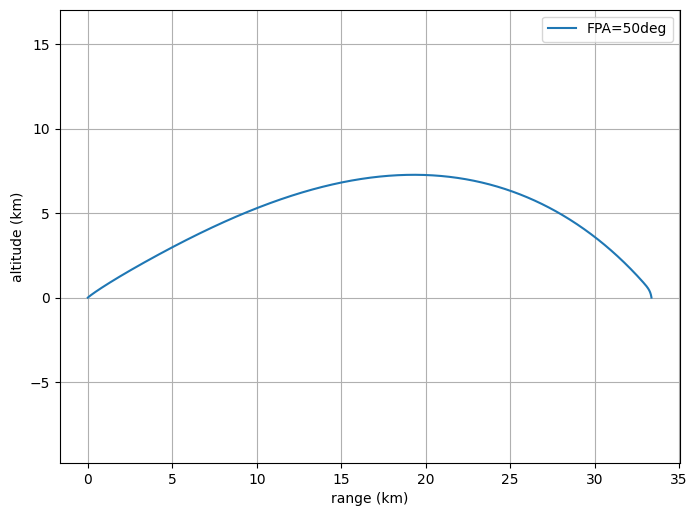

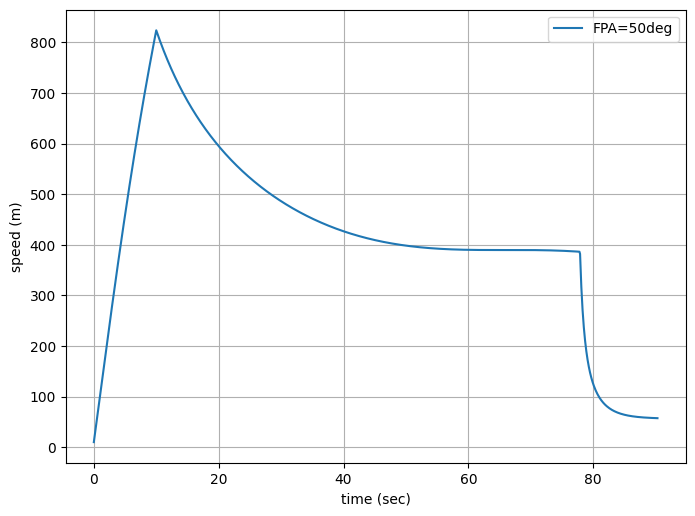

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.integrate as spi

m = 40
d = 0.16
S = np.pi*(d**2)/4
g = 9.8

# function that returns dy/dt=[hdot, vdot]
def model(z,t):                     #인수는 변하는 값만
  v, gamma, r, h = z                  
  rho = 1.225*(1-2.256e-5*h)**5.256 # air density
  Cd, T = 0.2, 0

  if t<10:
    T = 4000 
  
  if gamma<=0 and h<=1000:
    Cd = 10

  vdot = -0.5*rho*(v**2)*S*Cd/m - g*np.sin(gamma) + T/m #주어진 식 활용
  gammadot = -g*np.cos(gamma)/v
  rdot = v*np.cos(gamma)
  hdot = v*np.sin(gamma)
  
  return np.array([vdot, gammadot,rdot,hdot])
  
# time points
t = np.arange(0,1000,0.1) #t 영역
states_list = np.zeros((len(t),4)) #np.zeros : (())괄호 2개

ic = [10,50*np.pi/180,0,0]
states_list[0]=ic

for j in range(len(t)-1):
  state = spi.odeint(model,states_list[j],[t[j],t[j+1]]) #다른 방법??
  states_list[j+1]=state[-1] #대입했으니 j+1까지 표시해야됨.
  if states_list[j+1,3]<0:
    break
  
plt.figure(num=1, figsize=(8,6), dpi=100)
plt.plot(states_list[:j+1,2]/1000 , states_list[:j+1,3]/1000, label=f'FPA=50deg')
plt.figure(num=2, figsize=(8,6), dpi=100)
plt.plot(t[:j], states_list[:j,0], label=f'FPA=50deg')

plt.figure(num=1, figsize=(8,6), dpi=100)
plt.xlabel(r'range (km)')
plt.ylabel(r'altitude (km)')
plt.axis('equal')
plt.legend()
plt.grid()

plt.figure(num=2, figsize=(8,6), dpi=100)
plt.xlabel(r'time (sec)')
plt.ylabel(r'speed (m)')
plt.legend()
plt.grid()
plt.show()


<br> 

**(Problem 4)** What is the appropriate launch angle, $\gamma(0)$, for delivery to a customer located at 12km far? How long would the delivery to this customer take? How high would your rocket reach during the flight?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.integrate as spi

m = 40
d = 0.16
S = np.pi*(d**2)/4
g = 9.8

# function that returns dy/dt=[hdot, vdot]
def model(z,t):                     #인수는 변하는 값만
  v, gamma, r, h = z                  
  rho = 1.225*(1-2.256e-5*h)**5.256 # air density
  Cd, T = 0.2, 0

  if t<10:
    T = 4000
  
  if gamma<=0 and h<=1000:
    Cd = 10

  vdot = -0.5*rho*(v**2)*S*Cd/m - g*np.sin(gamma) + T/m #주어진 식 활용
  gammadot = -g*np.cos(gamma)/v
  rdot = v*np.cos(gamma)
  hdot = v*np.sin(gamma)
  
  return np.array([vdot, gammadot,rdot,hdot])
  
# time points
t = np.arange(0,1000,0.1) #t 영역
states_list = np.zeros((len(t),4)) #np.zeros : (())괄호 2개
fpa_list = np.arange(0,90,0.1)

for i in fpa_list :
  ic = [10,i*np.pi/180,0,0]
  states_list[0]=ic

  for j in range(len(t)):
    state = spi.odeint(model,states_list[j],[t[j],t[j+1]]) #다른 방법??
    states_list[j+1]=state[-1] #대입했으니 j+1까지 표시해야됨.
    if states_list[j+1,3]<0: #states_list[j+1]<0이면 지면 도달. 이때의 거리는 states_list[j+1,2]에 존재.
      if abs(states_list[j+1,2]/1000 -12) < 1 :
        print(" %.2f degree : %.3fKm(r), %.6fkm(h), %f sec" %(i ,states_list[j+1,2]/1000 ,(np.max(states_list[:,3]))/1000,t[j+1] ) ) #나중에 pandas로 구현해서 따로 빼보자.
      break

    


  


 31.30 degree : 11.312Km(r), 1.001869km(h), 41.500000 sec
 31.40 degree : 12.235Km(r), 1.021050km(h), 42.600000 sec
 31.50 degree : 12.758Km(r), 1.040411km(h), 43.300000 sec
 85.20 degree : 12.900Km(r), 26.813921km(h), 159.600000 sec
 85.30 degree : 12.641Km(r), 26.835755km(h), 159.600000 sec
 85.40 degree : 12.381Km(r), 26.857140km(h), 159.700000 sec
 85.50 degree : 12.121Km(r), 26.878100km(h), 159.700000 sec
 85.60 degree : 11.860Km(r), 26.898606km(h), 159.800000 sec
 85.70 degree : 11.598Km(r), 26.918659km(h), 159.800000 sec
 85.80 degree : 11.336Km(r), 26.938279km(h), 159.900000 sec
 85.90 degree : 11.074Km(r), 26.957449km(h), 159.900000 sec


실행 결과 :

소요 시간, Range를 전부 고려했을 때 31.4도로 발사하는 것이 가장 나을 것이다. 
Range는 12kM와 비슷할 수록 좋을 것이고 소요 시간은 짧을 수록 나을 것이다.


 31.30 degree : 11.312Km(r), 1.001869km(h), 41.500000 sec

 31.40 degree : 12.235Km(r), 1.021050km(h), 42.600000 sec

 31.50 degree : 12.758Km(r), 1.040411km(h), 43.300000 sec

 85.20 degree : 12.900Km(r), 26.813921km(h), 159.600000 sec

 85.30 degree : 12.641Km(r), 26.835755km(h), 159.600000 sec

 85.40 degree : 12.381Km(r), 26.857140km(h), 159.700000 sec

 85.50 degree : 12.121Km(r), 26.878100km(h), 159.700000 sec

 85.60 degree : 11.860Km(r), 26.898606km(h), 159.800000 sec

 85.70 degree : 11.598Km(r), 26.918659km(h), 159.800000 sec

 85.80 degree : 11.336Km(r), 26.938279km(h), 159.900000 sec

 85.90 degree : 11.074Km(r), 26.957449km(h), 159.900000 sec
 
 